In [5]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [6]:
df= pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
df.shape

(768, 9)

In [10]:
y= df['Outcome']
X= df.drop('Outcome', axis= 1)
X.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

In [13]:
#standard scaler to scale the features for preprocessing
scaler= StandardScaler()
scale = scaler.fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

In [14]:
#Create a Logistic Regression Model

model= LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [30]:
#Prediction

y_predicted= model.predict(X_test)
y_predicted.shape

(154,)

# Accuracy of the model

In [21]:

model.score(X_test, y_test)

0.7532467532467533

In [31]:
score= accuracy_score(y_test, y_predicted)
score

0.7532467532467533

# Create a Confusion Matrix

In [37]:

con_matrix= confusion_matrix(y_test, y_predicted)
print('Confusion Matrix: \n', con_matrix)

Confusion Matrix: 
 [[79 20]
 [18 37]]


In [34]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predicted).ravel()
(tn, fp, fn, tp)

(79, 20, 18, 37)

# Confusion matrix metrics

In [38]:


matrix= classification_report(y_test, pred)
print('Classification Report: \n', matrix)

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



# Visualization with Seaborn

Text(95.72222222222221, 0.5, 'Truth')

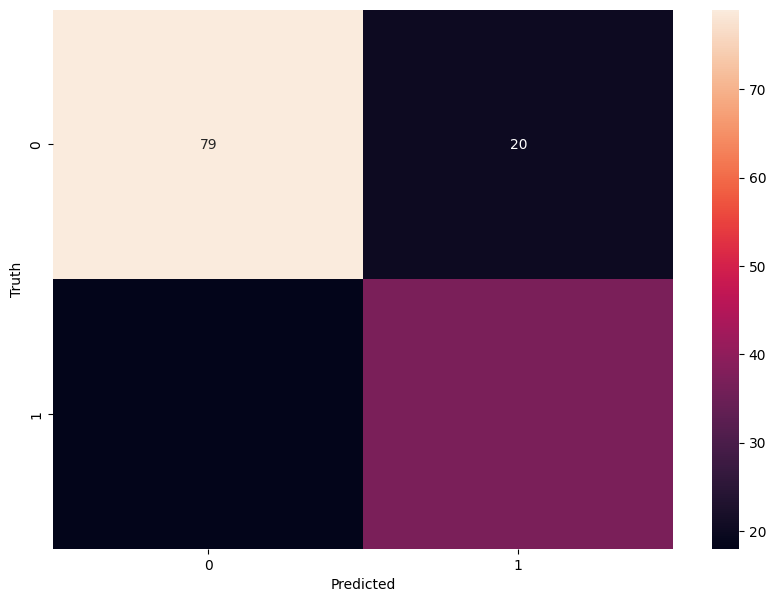

In [39]:
%matplotlib inline
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(con_matrix, annot= True)
plt.xlabel('Predicted')
plt.ylabel('Truth')